# Step1  Data Cleaning and Preparation


## Loading Data

In [2]:
import pandas as pd
import numpy as np
cars = pd.read_csv("pakwheels_used_car_data_v02.csv")

In [3]:
cars.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


## Handling Missing Values



In [4]:
cars.isnull().sum()
cars_clean = cars.dropna(axis=1) 
cars_fill = cars.fillna(0)





In [5]:
cars_fill.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,0,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,0,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,0,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,0,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,0,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


##  DataTransformation

In [6]:
cars_fill = pd.get_dummies(cars_fill, columns=['city', 'assembly', 'body', 'model', 'transmission', 'fuel', 'color', 'registered'])

# Print columns to verify 'make' exists
print(cars_fill.columns)

# Attempting to access 'make'
try:
    print(cars_fill['make'])
    print(cars_fill.head())
except KeyError as e:
    print(f"KeyError: {e}")
  


Index(['addref', 'make', 'year', 'engine', 'mileage', 'price',
       'city_Abbottabad', 'city_Abdul', 'city_Adda', 'city_Ahmed',
       ...
       'registered_Swabi', 'registered_Swat', 'registered_Tando Allah Yar',
       'registered_Thatta', 'registered_Toba Tek Singh',
       'registered_Un-Registered', 'registered_Vehari', 'registered_Wah cantt',
       'registered_Wazirabad', 'registered_Zafarwal'],
      dtype='object', length=1286)
0        Toyota
1         Honda
2        Toyota
3        Suzuki
4         Honda
          ...  
77873     Honda
77874    Suzuki
77875        MG
77876    Suzuki
77877    Toyota
Name: make, Length: 77878, dtype: object
    addref    make    year  engine  mileage      price  city_Abbottabad  \
0  7943732  Toyota  2013.0  1300.0   145000  2870000.0                0   
1  7730314   Honda  2000.0  1300.0   230000   995000.0                0   
2  7943737  Toyota  2021.0  1300.0    60500  3585000.0                0   
3  7943733  Suzuki  2017.0  1300.0    8

## Splitting Data into training and testing


In [8]:
from sklearn.model_selection import train_test_split
X_vehicle = cars_fill.drop(columns=['price'])
y_vehicle = cars_fill['price']


X_train_vehicle, X_test_vehicle, y_train_vehicle, y_test_vehicle = train_test_split(X_vehicle, y_vehicle, test_size=0.2, random_state=42)


print(X_train_vehicle.head())
print('\n\n\n\n\n')
print(X_test_vehicle.head())


        addref    make    year  engine  mileage  city_Abbottabad  city_Abdul  \
68526  7808203  Suzuki  2011.0  1000.0   125000                0           0   
58128  7841339  Toyota  1999.0  1300.0   300000                0           0   
11259  7933382  Suzuki  2016.0  1000.0    82000                0           0   
17147  7926481  Toyota  2018.0  1300.0    80000                0           0   
23680  7917007  Nissan  2010.0  1500.0   110000                0           0   

       city_Adda  city_Ahmed  city_Akora  ...  registered_Swabi  \
68526          0           0           0  ...                 0   
58128          0           0           0  ...                 0   
11259          0           0           0  ...                 0   
17147          0           0           0  ...                 0   
23680          0           0           0  ...                 0   

       registered_Swat  registered_Tando Allah Yar  registered_Thatta  \
68526                0                     

# Step 2 Data Analysis and Visualisation


## Exploratory Data Analysis (EDA):

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
print("Cars Summary")
print(cars_fill.describe(include = 'all'))

Cars Summary
              addref    make          year        engine         mileage  \
count   7.787800e+04   77878  77878.000000  77878.000000    77878.000000   
unique           NaN      68           NaN           NaN             NaN   
top              NaN  Toyota           NaN           NaN             NaN   
freq             NaN   24910           NaN           NaN             NaN   
mean    7.809878e+06     NaN   1889.295937   1408.018309    91109.192750   
std     2.599523e+05     NaN    483.131016    704.500585    89275.336173   
min     2.748970e+05     NaN      0.000000      0.000000        1.000000   
25%     7.805760e+06     NaN   2006.000000   1000.000000    34000.000000   
50%     7.865805e+06     NaN   2014.000000   1300.000000    80000.000000   
75%     7.910334e+06     NaN   2019.000000   1600.000000   123456.000000   
max     7.943741e+06     NaN   2022.000000  15000.000000  1000000.000000   

               price  city_Abbottabad    city_Abdul     city_Adda  \
count

### Cars


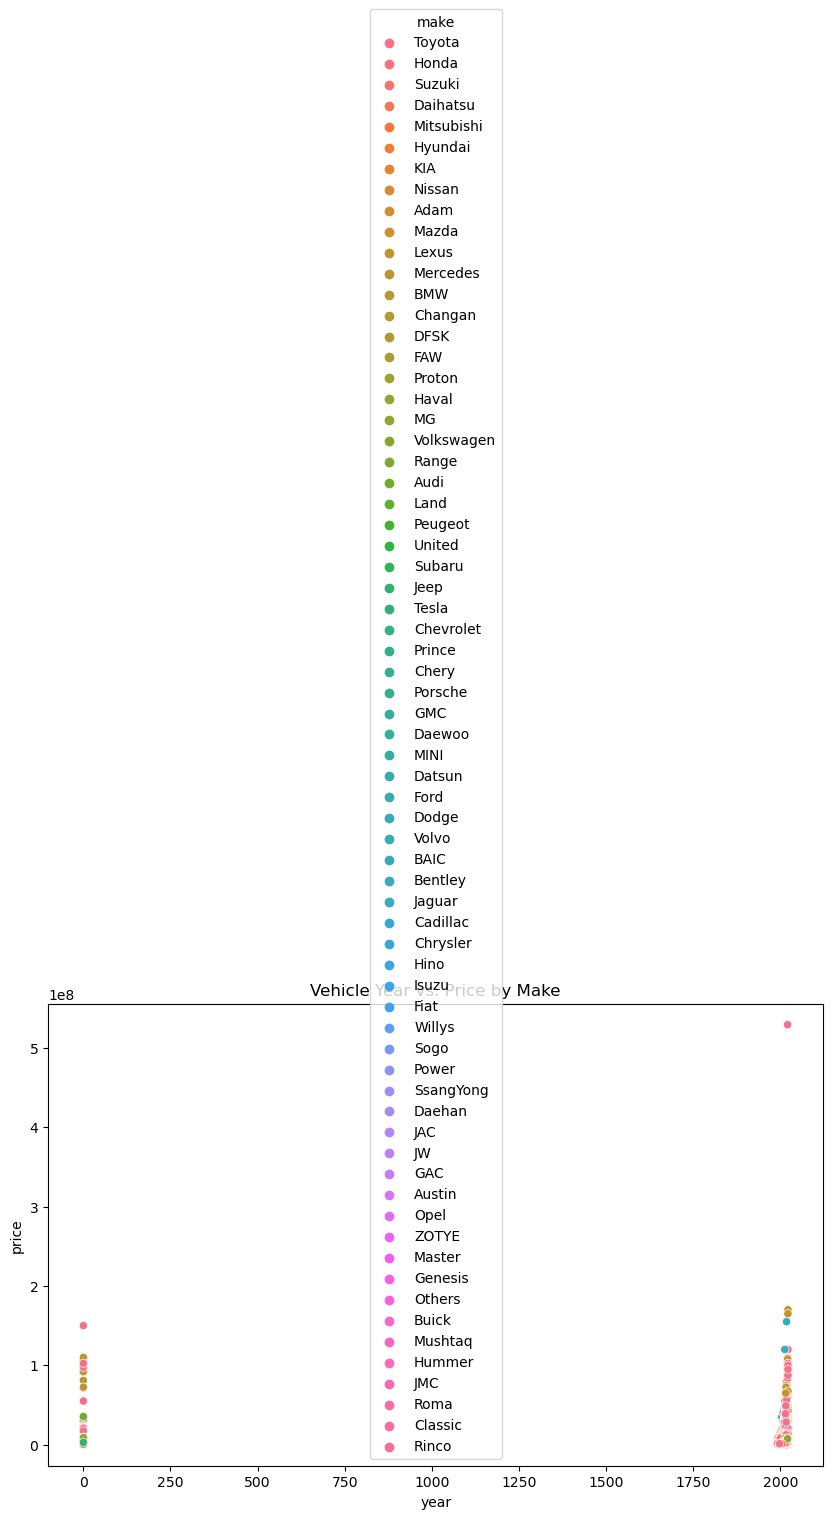

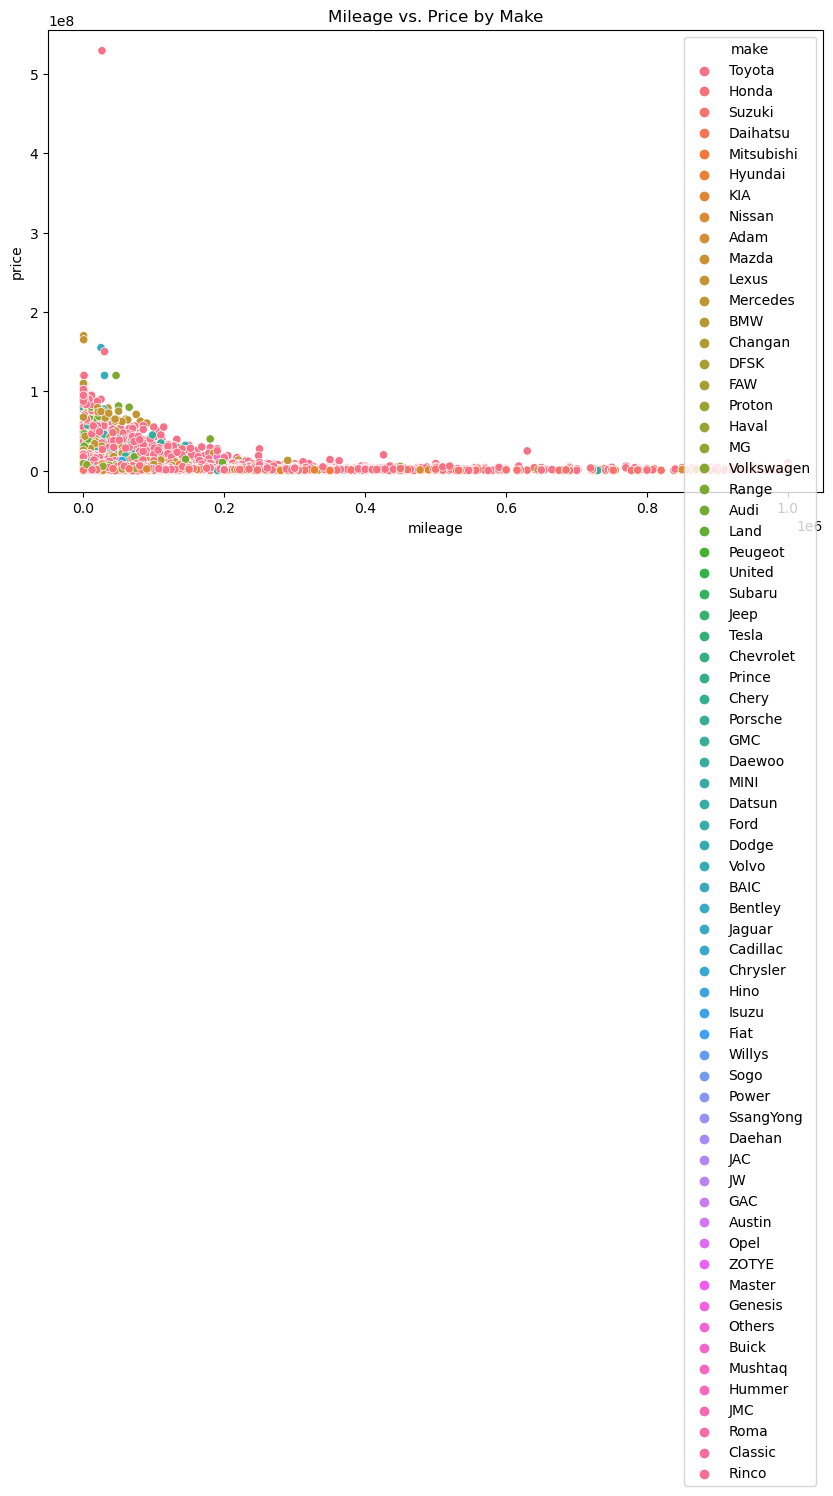

In [10]:
# Scatter plot for year vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars_fill, x='year', y='price', hue='make')
plt.title('Vehicle Year vs. Price by Make')
plt.show()

# Scatter plot for mileage vs. price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cars_fill, x='mileage', y='price', hue='make')
plt.title('Mileage vs. Price by Make')
plt.show()




## Visualisation

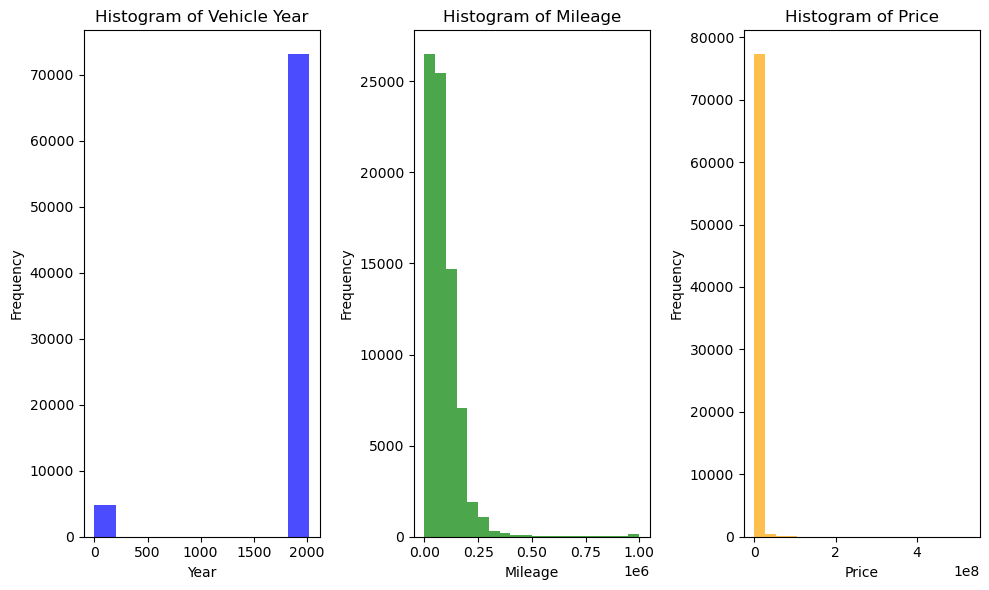

In [11]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(cars_fill['year'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Vehicle Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(cars_fill['mileage'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(cars_fill['price'], bins=20, color='orange', alpha=0.7)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


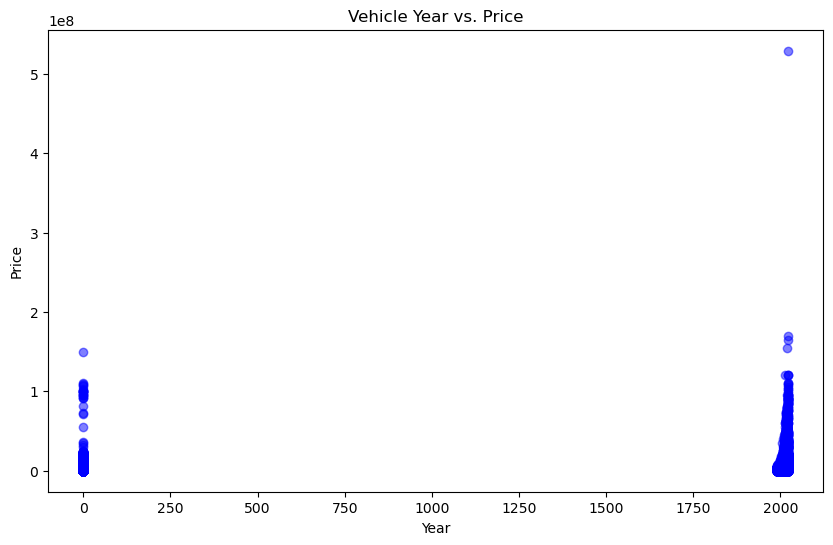

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(cars_fill['year'], cars_fill['price'], color='blue', alpha=0.5)
plt.title('Vehicle Year vs. Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


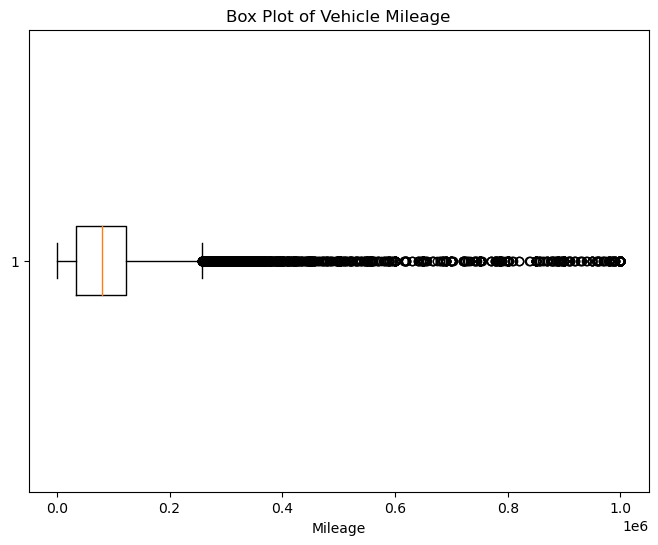

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(cars_fill['mileage'], vert=False)
plt.title('Box Plot of Vehicle Mileage')
plt.xlabel('Mileage')
plt.show()
